# WDI & HPI Capstone Project

### Machine Learning Engineer Nanodegree

### Domain Background
The World Development Indicators (WDI) is the World Bank's most comprehensive collection of cross-country development data. The World Development Indicators is a collection of data on global development and poverty reduction that are relevant, high-quality, and internationally comparable. The database comprises 1,400 time series indicators for 217 economies and more than 40 nation groupings, with many of the indicators having data going all the way back more than 50 years.

The Happy Planet Index is a measure of sustainable wellbeing that ranks countries based on how effectively they use limited natural resources to produce long, happy lives. We need it because multiple crises, such as persistent inequalities, accelerating climate breakdown, and rapid biodiversity loss, are interconnected and stem from the same root cause: our economies are structured, governed, and measured to promote short-term economic growth over long-term collective wellbeing. Governments frequently place faster economic growth above all other considerations. They lose sight of what really matters: people living long, happy, and sustainable lives all across the world.

### Problem Statement
The project aims to analyze the data and answer some questions that are relative to global development and poverty reduction for each dataset, and we will try to understand the problems that some countries are having then we will try to find the causation of it. in addition, we will use what I've learned in Machine learning to build a model that predict the happiness and well-being rate for some countries.

### Solution Statement
We will start with data cleaning and preparing, like checking the null values and so on, then we will choose some countries to focus on since the WDI dataset has so many countries and we will choose which years we will be focusing on since not all the data are available after that we will try to answer to interesting questions to better understands the datasets and the problems each country have after that, we will build a model to predict the happiness and well-being rate for some countries and the reasons behind it.

In [138]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing


In [139]:
#reading the datasets
df_wdi = pd.read_csv('WDI_Data.csv')
df_wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Topic,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Environment: Energy production & use,nan,nan,nan,nan,nan,...,15.98,16.32,16.64,16.99,17.31,17.60,nan,nan,nan,nan
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,Environment: Energy production & use,nan,nan,nan,nan,nan,...,28.38,32.22,32.05,31.32,33.31,38.38,39.75,42.17,43.64,nan
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,Environment: Energy production & use,nan,nan,nan,nan,nan,...,15.30,20.53,19.46,17.79,16.55,23.91,24.62,26.81,28.84,nan
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,Environment: Energy production & use,nan,nan,nan,nan,nan,...,65.47,66.30,66.50,65.83,66.93,68.72,71.09,71.99,73.59,nan
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,Financial Sector: Access,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [140]:
df_hpi = pd.read_csv('HPI_Data.csv')
df_hpi.head()

,HPI rank,Country,ISO,Unnamed: 3,Continent,Population (thousands),Life Expectancy (years),Ladder of life (Wellbeing) (0-10),Ecological Footprint (g ha),HPI,Biocapacity for year \n(g ha),GDP per capita ($),year
0,1.00,Costa Rica,CRI,2018CRI,1,4999.40,80.10,7.14,2.60,63.30,1.57,20074,2018
1,4.00,Vanuatu,VUT,2018VUT,8,292.70,70.30,6.87,1.62,59.60,1.57,3128,2018
2,8.00,Colombia,COL,2018COL,1,49661.10,77.10,5.98,1.89,57.50,1.57,14357,2018
3,6.00,Switzerland,CHE,2018CHE,3,8525.60,83.60,7.51,4.29,58.10,1.57,68246,2018
4,2.00,Ecuador,ECU,2018ECU,1,17084.40,76.80,6.13,1.63,60.20,1.57,11562,2018


## Data Exploration & Preparation

### 1. df_wdi

In [141]:
df_wdi.shape

(383838, 66)

In [142]:
df_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383838 entries, 0 to 383837
Data columns (total 66 columns):
Country Name      383838 non-null object
Country Code      383838 non-null object
Indicator Name    383838 non-null object
Indicator Code    383838 non-null object
Topic             383838 non-null object
1960              37538 non-null float64
1961              42455 non-null float64
1962              44706 non-null float64
1963              44549 non-null float64
1964              45102 non-null float64
1965              47301 non-null float64
1966              47348 non-null float64
1967              49077 non-null float64
1968              48654 non-null float64
1969              50488 non-null float64
1970              69215 non-null float64
1971              76229 non-null float64
1972              79351 non-null float64
1973              78843 non-null float64
1974              80339 non-null float64
1975              84051 non-null float64
1976              86365 non-

In [143]:
# Show columns with less missing data
columns_less_nulls = set(df_wdi.columns[df_wdi.isnull().mean() < 0.5])
print('less than 50% are missing columns:')
columns_less_nulls

less than 50% are missing columns:


{'2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 'Country Code',
 'Country Name',
 'Indicator Code',
 'Indicator Name',
 'Topic'}

#### so we will be focusing on 2018 

In [144]:
# Create sub-DataFrame of WDI data for 2018, 2019, 2020 
df_wdi= df_wdi[['Country Name', 'Country Code','Topic', 'Indicator Name', 'Indicator Code'
            , '2018', '2019', '2020']]

In [145]:
df_wdi.columns

Index(['Country Name', 'Country Code', 'Topic', 'Indicator Name',
       'Indicator Code', '2018', '2019', '2020'],
      dtype='object')

In [146]:
#check for the null values
df_wdi.isna().sum()

Country Name           0
Country Code           0
Topic                  0
Indicator Name         0
Indicator Code         0
2018              180761
2019              209775
2020              298646
dtype: int64

In [147]:
#Explore the Topics to choose questions to answer
topic_list = df_wdi['Topic'].unique().tolist()
topic_list

['Environment: Energy production & use',
 'Financial Sector: Access',
 'Social Protection & Labor: Performance',
 'Education: Participation',
 'Economic Policy & Debt: National accounts: Adjusted savings & income',
 'Health: Reproductive health',
 'Health: Risk factors',
 'Health: Population: Dynamics',
 'Environment: Land use',
 'Environment: Agricultural production',
 'Environment: Emissions',
 'Private Sector & Trade: Exports',
 'Private Sector & Trade: Imports',
 'Economic Policy & Debt: National accounts: Shares of GDP & other',
 'Economic Policy & Debt: National accounts: Growth rates',
 'Economic Policy & Debt: National accounts: US$ at constant 2015 prices: Value added',
 'Economic Policy & Debt: National accounts: Local currency at constant prices: Value added',
 'Economic Policy & Debt: National accounts: Local currency at current prices: Value added',
 'Economic Policy & Debt: National accounts: US$ at current prices: Value added',
 'Infrastructure: Transportation',
 'Enviro

In [148]:
#the number of topics in the dataset
df_wdi['Topic'].nunique()

90

In [149]:
df_wdi.dtypes

Country Name       object
Country Code       object
Topic              object
Indicator Name     object
Indicator Code     object
2018              float64
2019              float64
2020              float64
dtype: object

In [150]:
#list of the countries in the dataset
country_list = df_wdi['Country Name'].unique().tolist()
country_list

['Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'M

In [151]:
#number of the countries in the dataset
df_wdi['Country Name'].nunique()

266

In [152]:
#change format to make the numbers more clear and organized 
pd.options.display.float_format = "{:.2f}".format

In [153]:
#fill the null values with 0s
df_wdi = pd.DataFrame(df_wdi).fillna(0)

In [154]:
# Create DataFrame of WDI data for 2018 since it is the closest yet has the less missing values
# thus, we will compare it with the HPI data later
year = '2018'
custom_list = [[df_wdi['Topic'][row], df_wdi['Indicator Code'][row],df_wdi['Country Name'][row],df_wdi[year][row]] for row in range(len(df_wdi))]
df_columns = ['Topic','Indicator Code', 'Country Name', year]
custom_wdi_df = pd.DataFrame(custom_list, columns = df_columns)
custom_wdi_df = custom_wdi_df.dropna()

In [155]:
custom_wdi_df.head()

,Topic,Indicator Code,Country Name,2018
0,Environment: Energy production & use,EG.CFT.ACCS.ZS,Africa Eastern and Southern,0.00
1,Environment: Energy production & use,EG.ELC.ACCS.ZS,Africa Eastern and Southern,42.17
2,Environment: Energy production & use,EG.ELC.ACCS.RU.ZS,Africa Eastern and Southern,26.81
3,Environment: Energy production & use,EG.ELC.ACCS.UR.ZS,Africa Eastern and Southern,71.99
4,Financial Sector: Access,FX.OWN.TOTL.ZS,Africa Eastern and Southern,0.00


In [156]:
print('\nShape:',custom_wdi_df.shape)


Shape: (383838, 4)


#### 2. HPI dataset

In [157]:
df_hpi.columns

Index(['HPI rank', 'Country', 'ISO', 'Unnamed: 3', 'Continent',
       'Population (thousands)', 'Life Expectancy (years)',
       'Ladder of life (Wellbeing) (0-10)', 'Ecological Footprint (g ha)',
       'HPI', 'Biocapacity for year \n(g ha)', 'GDP per capita ($)', 'year'],
      dtype='object')

In [158]:
df_hpi.shape

(456, 13)

In [159]:
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 13 columns):
HPI rank                             386 non-null float64
Country                              456 non-null object
ISO                                  456 non-null object
Unnamed: 3                           456 non-null object
Continent                            456 non-null int64
Population (thousands)               456 non-null float64
Life Expectancy (years)              446 non-null float64
Ladder of life (Wellbeing) (0-10)    393 non-null float64
Ecological Footprint (g ha)          413 non-null float64
HPI                                  386 non-null float64
Biocapacity for year 
(g ha)         456 non-null float64
GDP per capita ($)                   453 non-null object
year                                 456 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 46.4+ KB


In [160]:
#check the null values in the dataset
df_hpi.isna().sum()

HPI rank                             70
Country                               0
ISO                                   0
Unnamed: 3                            0
Continent                             0
Population (thousands)                0
Life Expectancy (years)              10
Ladder of life (Wellbeing) (0-10)    63
Ecological Footprint (g ha)          43
HPI                                  70
Biocapacity for year \n(g ha)         0
GDP per capita ($)                    3
year                                  0
dtype: int64

In [161]:
#check the unique years in the dataset
df_hpi['year'].unique()

array([2018, 2019, 2020], dtype=int64)

In [162]:
#check the unique countries in the dataset
df_hpi['Country'].unique()

array(['Costa Rica', 'Vanuatu', 'Colombia', 'Switzerland', 'Ecuador',
       'Panama', 'Jamaica', 'Guatemala', 'Honduras', 'Uruguay',
       'New Zealand', 'Philippines', 'El Salvador', 'United Kingdom',
       'Peru', 'Nicaragua', 'Tajikistan', 'Netherlands',
       'Dominican Republic', 'Armenia', 'Brazil', 'Bangladesh', 'Mexico',
       'Uzbekistan', 'Kyrgyzstan', 'Serbia', 'Nepal', 'Thailand',
       'Germany', 'Spain', 'France', 'Mauritius', 'Finland', 'Senegal',
       'Ireland', 'Albania', 'Moldova', 'Norway', 'Morocco', 'Italy',
       'Sweden', 'Palestine, State of', 'Argentina', 'Indonesia',
       'Cyprus', 'Venezuela', 'Greece', 'Vietnam', 'Israel', 'Azerbaijan',
       'Cambodia', 'Iceland', 'Slovenia', 'Bosnia and Herzegovina',
       'Paraguay', 'Congo (Brazzaville)', 'Japan', 'Czech Republic',
       'Austria', 'Sri Lanka', 'Slovakia', 'Algeria', 'Portugal',
       'Romania', 'Croatia', 'Liberia', 'Chile', 'Singapore', 'Hungary',
       'Denmark', 'Iraq', 'Kenya', 'Paki

In [163]:
#check the max country Population 
df_hpi[df_hpi['Population (thousands)'] == df_hpi['Population (thousands)'].max()]

,HPI rank,Country,ISO,Unnamed: 3,Continent,Population (thousands),Life Expectancy (years),Ladder of life (Wellbeing) (0-10),Ecological Footprint (g ha),HPI,Biocapacity for year \n(g ha),GDP per capita ($),year
397,49.00,China,CHN,2020CHN,8,1439323.80,77.10,5.77,3.74,45.60,1.55,..,2020


In [164]:
#check the min country Population 
df_hpi[df_hpi['Population (thousands)'] == df_hpi['Population (thousands)'].min()]

,HPI rank,Country,ISO,Unnamed: 3,Continent,Population (thousands),Life Expectancy (years),Ladder of life (Wellbeing) (0-10),Ecological Footprint (g ha),HPI,Biocapacity for year \n(g ha),GDP per capita ($),year
1,4.00,Vanuatu,VUT,2018VUT,8,292.70,70.30,6.87,1.62,59.60,1.57,3128,2018


## Data Analysis

### Q1: top 5 countries in 'Health: Population: Dynamics' topic

In [165]:
q1 = custom_wdi_df[custom_wdi_df['Topic']=='Health: Population: Dynamics'].sort_values(by=['2018'],ascending=False)[:10]
q1.head()

,Topic,Indicator Code,Country Name,2018
277110,Health: Population: Dynamics,SP.POP.DPND,Niger,110.88
277112,Health: Population: Dynamics,SP.POP.DPND.YG,Niger,105.41
246807,Health: Population: Dynamics,SP.POP.DPND,Mali,100.20
284486,Health: Population: Dynamics,SP.REG.BRTH.ZS,Oman,100.00
284487,Health: Population: Dynamics,SP.REG.BRTH.FE.ZS,Oman,100.00


<BarContainer object of 10 artists>

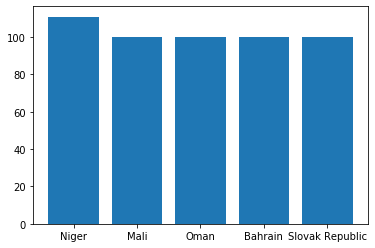

In [166]:
plt.bar(q1['Country Name'], q1['2018'])

### Q2: top 5 countries in 'Health: Disease prevention' topic

<BarContainer object of 14 artists>

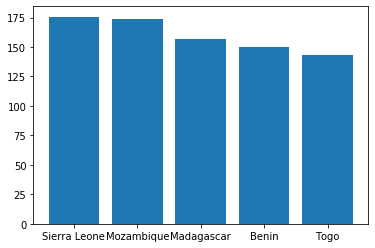

In [167]:
q2 = custom_wdi_df[custom_wdi_df['Topic']=='Education: Efficiency'].sort_values(by=['2018'],ascending=False)[:14]
plt.bar(q2['Country Name'], q2['2018'])

### Q3: top 5 countries in  'Economic Policy & Debt: National accounts: Shares of GDP & other' topic

<BarContainer object of 5 artists>

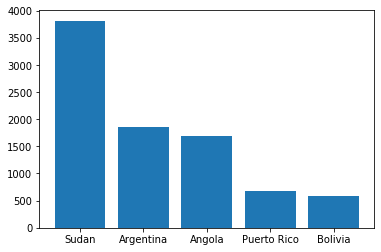

In [168]:
q3 = custom_wdi_df[custom_wdi_df['Topic']=='Economic Policy & Debt: National accounts: Shares of GDP & other'].sort_values(by=['2018'],ascending=False)[:5]
plt.bar(q3['Country Name'], q3['2018'])

### 2. df_hpi

In [169]:
def plotHPI(i):
    """
    function to print a Plot of selected year
    """
    q4 = df_hpi[df_hpi['year']==i].sort_values(by=['HPI'],ascending=False)[:5]
    print(plt.bar(q4['Country'], q4['HPI']))
    

### what countries has the best HPI score of 2018?

<BarContainer object of 5 artists>


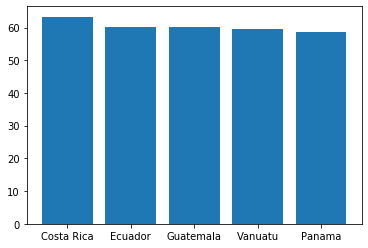

In [170]:
plotHPI(2018)

### what countries has the best HPI score of 2019?

<BarContainer object of 5 artists>


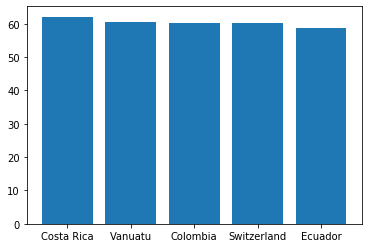

In [171]:
plotHPI(2019)

### what countries has the best HPI score of 2020?

<BarContainer object of 5 artists>


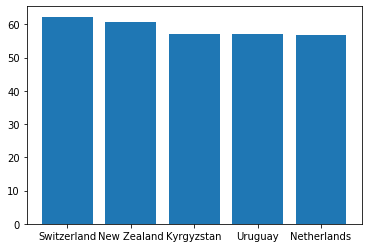

In [172]:
plotHPI(2020)

### what is the most effective features on the HPI?

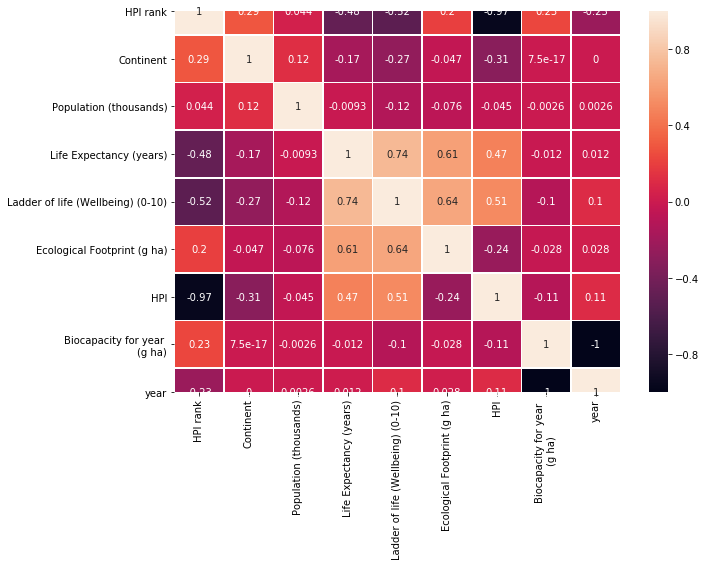

In [173]:
plt.figure(figsize = (10,7))
sns.heatmap(df_hpi.corr(), annot = True,linewidths=.5); 

### what is the mean of Population?

In [174]:
df_hpi['Population (thousands)'].describe()['mean']

49735.591228070174

### what is the top 5 most populated countries?

<BarContainer object of 5 artists>


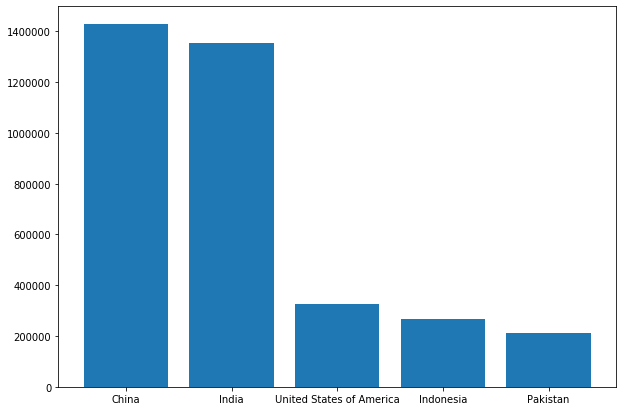

In [175]:
q5 = df_hpi[df_hpi['year']==2018].sort_values(by=['Population (thousands)'],ascending=False)[:5]
plt.figure(figsize = (10,7))
print(plt.bar(q5['Country'], q5['Population (thousands)']))

## Modeling

In [176]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import Pipeline

In [177]:
df_hpi['Continent']=np.nan_to_num(df_hpi['Continent'])
df_hpi['Population (thousands)']=np.nan_to_num(df_hpi['Population (thousands)'])
df_hpi['Life Expectancy (years)']=np.nan_to_num(df_hpi['Life Expectancy (years)'])
df_hpi['Ladder of life (Wellbeing) (0-10)']=np.nan_to_num(df_hpi['Ecological Footprint (g ha)'])
df_hpi['HPI']=np.nan_to_num(df_hpi['HPI'])

In [178]:
features=df_hpi[['Population (thousands)', 'Life Expectancy (years)',
       'Ladder of life (Wellbeing) (0-10)','year'
                ]]

#the target is Offer Event.  which is 'offer received', 'offer viewed', 'transaction', 'offer completed'
target=df_hpi['HPI'].values

#Creating training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

# use StandardScaler() to Standardize features by removing the mean and scaling to unit variance.
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [179]:
df_hpi['HPI'].fillna(0)

0     63.30
1     59.60
2     57.50
3     58.10
4     60.20
       ... 
451   32.00
452    0.00
453    0.00
454    0.00
455    0.00
Name: HPI, Length: 456, dtype: float64

### Metrics:

In [180]:
# 1. LinearRegression


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(x1_train, y1_train)
print('Training set score: ', model.score(x1_train, y1_train))
print('Test set score: ' ,model.score(x1_test, y1_test))
y_pred = model.predict(x1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y1_test, y_pred)
mbe = sum([(y1_test[i] - y_pred[i]) for i in range(0, len(y1_test))]) / len(y1_test)

print("mse = %s" % mse)
print("rmse = %s" % rmse)
print("mae = %s" % mae)
print("mbe = %s" % mbe)

print('Coefficient of determination (R^2): %.2f'
      % r2_score(y1_test, y_pred))

Training set score:  0.2989147140709514
Test set score:  0.29007817779917744
mse = 244.26445238960048
rmse = 15.62896197415556
mae = 11.179655553904762
mbe = -1.2087964974102927
Coefficient of determination (R^2): 0.29


In [181]:
#2. Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt =DecisionTreeRegressor(max_depth=2)
dt.fit(x1_train, y1_train)
print('Training set score: ', dt.score(x1_train, y1_train))
print('Test set score: ' ,dt.score(x1_test, y1_test))
y_pred = dt.predict(x1_test)
#print(classification_report(y1_test, y_pred))

mse = mean_squared_error(y1_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y1_test, y_pred)
mbe = sum([(y1_test[i] - y_pred[i]) for i in range(0, len(y1_test))]) / len(y1_test)

print("mse = %s" % mse)
print("rmse = %s" % rmse)
print("mae = %s" % mae)
print("mbe = %s" % mbe)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y1_test, y_pred))

Training set score:  0.5630784530045038
Test set score:  0.6266201571289718
mse = 128.46967088498255
rmse = 11.334446209894091
mae = 7.43913531723751
mbe = 0.4952835485682421
Coefficient of determination (R^2): 0.63


In [182]:
#3. Support Vector Regression

from sklearn.svm import SVR 

svr = SVR().fit(x1_train, y1_train)
svr.fit(x1_train, y1_train)
print('Training set score: ', svr.score(x1_train, y1_train))
print('Test set score: ' ,svr.score(x1_test, y1_test))
y_pred = svr.predict(x1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y1_test, y_pred)
mbe = sum([(y1_test[i] - y_pred[i]) for i in range(0, len(y1_test))]) / len(y1_test)

print("mse = %s" % mse)
print("rmse = %s" % rmse)
print("mae = %s" % mae)
print("mbe = %s" % mbe)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y1_test, y_pred))

Training set score:  0.27232503137671693
Test set score:  0.2299317705259314
mse = 264.95916661919824
rmse = 16.27756636046059
mae = 10.235505030208925
mbe = -5.2482405198370925
Coefficient of determination (R^2): 0.23


In [183]:
#4. Lasso Regression


lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x1_train, y1_train)
print('Training set score: ', lasso.score(x1_train, y1_train))
print('Test set score: ' ,lasso.score(x1_test, y1_test))
y_pred = lasso.predict(x1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y1_test, y_pred)
mbe = sum([(y1_test[i] - y_pred[i]) for i in range(0, len(y1_test))]) / len(y1_test)

print("mse = %s" % mse)
print("rmse = %s" % rmse)
print("mae = %s" % mae)
print("mbe = %s" % mbe)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y1_test, y_pred))

Training set score:  0.2987549837417396
Test set score:  0.2892575426065177
mse = 244.54681024884368
rmse = 15.63799252617943
mae = 11.180957059805486
mbe = -1.1962324592488642
Coefficient of determination (R^2): 0.29


In [184]:
#5. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x1_train, y1_train)
print('Training set score: ', rfr.score(x1_train, y1_train))
print('Test set score: ' ,rfr.score(x1_test, y1_test))
y_pred = rfr.predict(x1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y1_test, y_pred)
mbe = sum([(y1_test[i] - y_pred[i]) for i in range(0, len(y1_test))]) / len(y1_test)

print("mse = %s" % mse)
print("rmse = %s" % rmse)
print("mae = %s" % mae)
print("mbe = %s" % mbe)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y1_test, y_pred))

Training set score:  0.6449816241626314
Test set score:  0.6795699485586197
mse = 110.25111300545335
rmse = 10.50005300012592
mae = 6.610002968337298
mbe = 0.01817103223732739
Coefficient of determination (R^2): 0.68
